In [1]:
import random

import numpy as np

import torch
from gradient_estimation import relu, test

/home/kaiwen/anaconda3/envs/common-descent/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/kaiwen/anaconda3/envs/common-descent/lib/python3.9/site-packages/linear_operator/operators/_linear_operator.py:937: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  diag = torch.tensor(jitter_val, dtype=self.dtype, device=self.device)
  0%|                                                                                                                                                                              | 0/200 [00:00<?, ?it/s]/home/kaiwen/Desktop/local-bo-convergence/zoofoo/BFGS/LBFGS.py:296: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  p.data.add_(step_size, update[offset : offset + numel].view_as(p.data))
 14%|█████████

torch.Size([2, 1])
torch.Size([2])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 230.56it/s, loss=-1.46, ls=0.0197, os=0.000145, sn=0.00304]


nabla mu tensor([0.0002], device='cuda:0')
tensor([[ 1.4506e-04, -1.1689e-13],
        [-1.1689e-13,  6.2008e-01]], device='cuda:0')
trace 0.6200807822967911


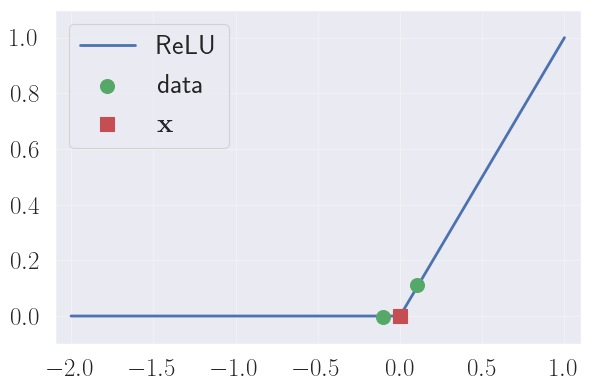

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

torch.set_default_dtype(torch.float64)

seed = 4321

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = "cuda:0"

x = torch.tensor([0.], device=device).unsqueeze(-2)

g, train_x, train_y = test(objective=relu, x=x, batch_size=2, device=device)

xx = np.linspace(-2, 1, num=1000)
yy = relu(torch.tensor(xx).unsqueeze(-1), noise_std=0.)

sns.set_theme()
sns.set_context("paper")
sns.set_style("darkgrid")

fig = plt.figure(figsize=(6, 4))

plt.plot(xx, yy, label='ReLU', linewidth=2, zorder=1)
plt.scatter(train_x.squeeze().cpu().numpy(), train_y.cpu().numpy(), c='g', s=100, label='data', zorder=2)
plt.scatter([0], [0], marker='s', c='r', s=100, label=r'$\mathbf{x}$', zorder=2)
plt.legend(fontsize=12)

plt.xlim(-2.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show()

# fig.savefig("relu_batch_2.eps")
# fig.savefig("relu_batch_4.eps")